# [T3] MNIST classification with softmax logistic regression

In [22]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [14]:
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)
print(mnist.train.num_examples)
print(mnist.validation.num_examples)
print(mnist.test.num_examples)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
55000
5000
10000


In [26]:
feature_size=mnist.train.images.shape[1]
pixel=int(np.sqrt(feature_size))

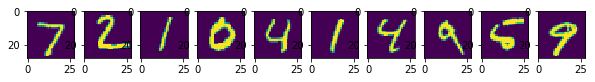

In [30]:
f,a=plt.subplots(1,10,figsize=(10,1))
for i in range(10):
    a[i].imshow(np.reshape(mnist.test.images[i],(pixel,pixel)))
f.show()

In [6]:
n_class=10
x=tf.placeholder(tf.float32,[None,feature_size],name='input_x')
W=tf.Variable(tf.zeros([feature_size,n_class]),name='W')
b=tf.Variable(tf.zeros([n_class]),name='b')
y=tf.nn.softmax(tf.matmul(x,W)+b)
y_=tf.placeholder(tf.float32,[None,n_class],name='input_y')

In [16]:
print(tf.trainable_variables())

[<tf.Variable 'W:0' shape=(784, 10) dtype=float32_ref>, <tf.Variable 'b:0' shape=(10,) dtype=float32_ref>, <tf.Variable 'W_1:0' shape=(784, 10) dtype=float32_ref>, <tf.Variable 'b_1:0' shape=(10,) dtype=float32_ref>]


In [7]:
cost=tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y),reduction_indices=[1]))
optimizer=tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(cost)
# accuracy_train=tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y,1),tf.argmax(y_,1)),tf.float32))

print(cost)
print(optimizer)
sess=tf.Session()


Tensor("Mean:0", shape=(), dtype=float32)
name: "GradientDescent"
op: "NoOp"
input: "^GradientDescent/update_W/ApplyGradientDescent"
input: "^GradientDescent/update_b/ApplyGradientDescent"



In [8]:
batch_xs,batch_ys=mnist.train.next_batch(100)
print(batch_xs.shape)
print(batch_ys.shape)
print(type(batch_xs))
print(type(batch_ys))
# print(batch_xs[0,:])
# print(batch_ys[0,:])

(100, 784)
(100, 10)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


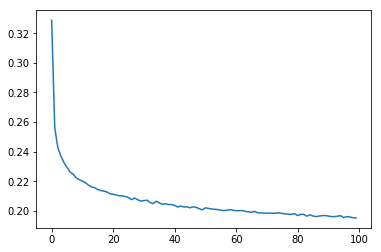

In [10]:
init=tf.global_variables_initializer()
sess.run(init)
avg_cost_list=[]
total_batch=int(mnist.train.num_examples/batch_size)
for epoch in range(training_epochs):
    # accuracy_list=[]
    avg_cost=0.
    
    for step in range(total_batch):
        batch_xs,batch_ys=mnist.train.next_batch(batch_size)
        sess.run(optimizer,feed_dict={x:batch_xs,y_:batch_ys})
        avg_cost+=sess.run(cost,feed_dict={x:batch_xs,y_:batch_ys})/total_batch
    avg_cost_list.append(avg_cost)
plt.plot(range(training_epochs),avg_cost_list)
# show training accuracy as iteraction in one epoch
#         accuracy_list.append(sess.run(accuracy_train,feed_dict={x:batch_xs,y_:batch_ys}))
# itr=range(total_batch)
# acc=accuracy_list
# plt.plot(itr,acc)
# plt.xlabel('iteraction')
# plt.ylabel('training accuracy')
# plt.show()

In [11]:
correct_prediction=tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,dtype='float32'))
ac=sess.run(accuracy,feed_dict={x:mnist.test.images, y_:mnist.test.labels})
print(str(ac*100)+'%')


92.18000173568726%


In [12]:
sess.close()